## ML Homework №1
Task is based on the materials of course  [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (National Research University Higher School of Economics, Faculty of computer science).

You need to analyze the data set [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (source: UCI Machine Learning Repository) using Python, pandas, numpy, scipy.

### Task 1
How many men and women are in the sample?

In [2]:
import pandas as pd
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header=None , names=["age", "workclass", "fnlwgt", "education", 
                            "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                            "hours-per-week", "native-country", "50K"] , skipinitialspace=True )
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [15]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Task 2 
What is the standard deviation of the age of men?


In [17]:
data[data.sex == 'Male'].age.std()

13.37063019252649

### Task 3
What is the proportion of US citizens?

In [18]:
data[data['native-country'] == 'United-States'].age.count()/data.age.count()

0.89585700684868397

### Task 4
Draw a distribution of education level in the form of a bar chart(bar plot).

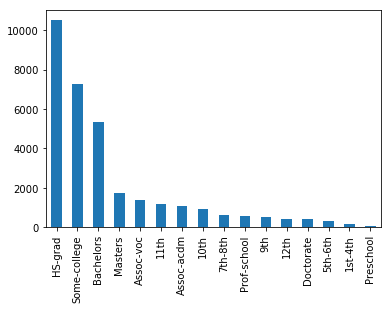

In [16]:
%matplotlib inline

data['education'].value_counts().plot(kind='bar')


### Task 5
Is it true that people earning more than 50 thousand mostly have higher education?

In [26]:
a = data[(data['50K'] == '>50K') & (data['education-num'] > 12)].sex.count()/data[(data['50K'] == '>50K')].sex.count()
print(a)
if a > 0.5:
    print('YES')
else: print('NO')

0.498533350338
NO


### Task 6
What is the maximum age of men and women of each race?

In [21]:
data.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Task 7
People from which countries work as farmers / fishermen?

In [22]:
data.groupby(['occupation']).get_group('Farming-fishing')['native-country'].value_counts()

United-States    879
Mexico            77
Puerto-Rico        5
?                  5
Guatemala          4
Philippines        4
Canada             2
Vietnam            2
Italy              2
El-Salvador        2
Cuba               2
France             1
Japan              1
Portugal           1
Ireland            1
Cambodia           1
Germany            1
Poland             1
England            1
Yugoslavia         1
Hong               1
Name: native-country, dtype: int64

### Task 8
Consider two relationships 1) the number of male bachelors to the number of male masters and 2) the number of female bachelors to the number of female masters. What is the ratio more?


In [3]:
f = data[(data['education'] == 'Bachelors') & (data['sex'] == 'Male')].sex.count()/data[(data['education'] == 'Masters') & (data['sex'] == 'Male')].sex.count()
s = data[(data['education'] == 'Bachelors') & (data['sex'] == 'Female')].sex.count()/data[(data['education'] == 'Masters') & (data['sex'] == 'Female')].sex.count()

if f > s: print('f')
else: print('s')

f


### Task 9
What is the maximum number of working hours per week? How many people work so many hours a week? What is their earnings?

In [24]:
maxhours = data['hours-per-week'].max()
print(maxhours, data[data['hours-per-week'] == maxhours]['capital-gain'].count())
data[data['hours-per-week'] == maxhours][['capital-gain']]

99 85


,capital-gain
935,0
1172,0
1887,0
3578,0
4086,0
4308,0
4441,0
5376,0
5432,2354
6618,0
